In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("yellow_tripdata_2017-01.csv")
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,09-01-2017 11:13,09-01-2017 11:25,1.0,3.3,1.0,N,263.0,161.0,1.0,12.5,0.0,0.5,2.00,0.0,0.3,15.30
2,1.0,09-01-2017 11:32,09-01-2017 11:36,1.0,0.9,1.0,N,186.0,234.0,1.0,5.0,0.0,0.5,1.45,0.0,0.3,7.25
3,1.0,09-01-2017 11:38,09-01-2017 11:42,1.0,1.1,1.0,N,164.0,161.0,1.0,5.5,0.0,0.5,1.00,0.0,0.3,7.30
4,1.0,09-01-2017 11:52,09-01-2017 11:57,1.0,1.1,1.0,N,236.0,75.0,1.0,6.0,0.0,0.5,1.70,0.0,0.3,8.50


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 17 columns):
VendorID                 1048574 non-null float64
tpep_pickup_datetime     1048574 non-null object
tpep_dropoff_datetime    1048574 non-null object
passenger_count          1048574 non-null float64
trip_distance            1048574 non-null float64
RatecodeID               1048574 non-null float64
store_and_fwd_flag       1048574 non-null object
PULocationID             1048574 non-null float64
DOLocationID             1048574 non-null float64
payment_type             1048574 non-null float64
fare_amount              1048574 non-null float64
extra                    1048574 non-null float64
mta_tax                  1048574 non-null float64
tip_amount               1048574 non-null float64
tolls_amount             1048574 non-null float64
improvement_surcharge    1048574 non-null float64
total_amount             1048574 non-null float64
dtypes: float64(14), object(3)
memory us

In [4]:
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,1.048574e+06,1.048574e+06,1.048574e+06,1.048574e+06,1.048574e+06,1.048574e+06,1.048574e+06,1.048574e+06,1.048574e+06,1.048574e+06,1.048574e+06,1.048574e+06,1.048574e+06,1.048574e+06
mean,1.554805e+00,1.679357e+00,3.012001e+00,1.045043e+00,1.611085e+02,1.592206e+02,1.369791e+00,1.309768e+01,2.281820e-01,4.971909e-01,1.699155e+00,2.898545e-01,2.996361e-01,1.611559e+01
std,4.969876e-01,1.289471e+00,3.796694e+00,4.514045e-01,6.775300e+01,7.199108e+01,5.026141e-01,5.261373e+02,3.180715e-01,4.066513e-02,2.766258e+00,1.730582e+00,1.431794e-02,5.261959e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-1.200000e+02,-4.500000e+00,-5.000000e-01,-6.060000e+00,0.000000e+00,-3.000000e-01,-1.203000e+02
25%,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.130000e+02,1.070000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.160000e+00
50%,2.000000e+00,1.000000e+00,1.700000e+00,1.000000e+00,1.610000e+02,1.620000e+02,1.000000e+00,9.000000e+00,0.000000e+00,5.000000e-01,1.200000e+00,0.000000e+00,3.000000e-01,1.130000e+01
75%,2.000000e+00,2.000000e+00,3.200000e+00,1.000000e+00,2.320000e+02,2.330000e+02,2.000000e+00,1.400000e+01,5.000000e-01,5.000000e-01,2.250000e+00,0.000000e+00,3.000000e-01,1.680000e+01
max,2.000000e+00,9.000000e+00,1.517000e+02,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,5.385792e+05,5.554000e+01,5.000000e-01,9.999900e+02,9.055400e+02,3.000000e-01,5.385800e+05


In [5]:
# Since the data is very huge we need to filter the data based on our needs
df1 = df[(df['RatecodeID']==1) & (df['total_amount']<75) & (df['payment_type']==1) & ((df['trip_distance']!=0) & df['total_amount']!=0) & (df['trip_distance']<80)]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 645582 entries, 1 to 1048574
Data columns (total 17 columns):
VendorID                 645582 non-null float64
tpep_pickup_datetime     645582 non-null object
tpep_dropoff_datetime    645582 non-null object
passenger_count          645582 non-null float64
trip_distance            645582 non-null float64
RatecodeID               645582 non-null float64
store_and_fwd_flag       645582 non-null object
PULocationID             645582 non-null float64
DOLocationID             645582 non-null float64
payment_type             645582 non-null float64
fare_amount              645582 non-null float64
extra                    645582 non-null float64
mta_tax                  645582 non-null float64
tip_amount               645582 non-null float64
tolls_amount             645582 non-null float64
improvement_surcharge    645582 non-null float64
total_amount             645582 non-null float64
dtypes: float64(14), object(3)
memory usage: 88.7+ MB


In [6]:
df1 = df1.drop(df1.index[500000:],0)

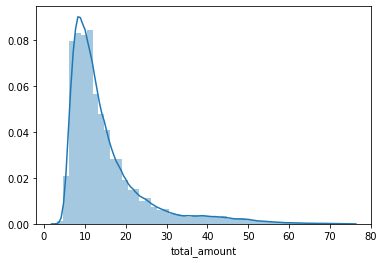

In [7]:
sns.distplot(df1['total_amount'])

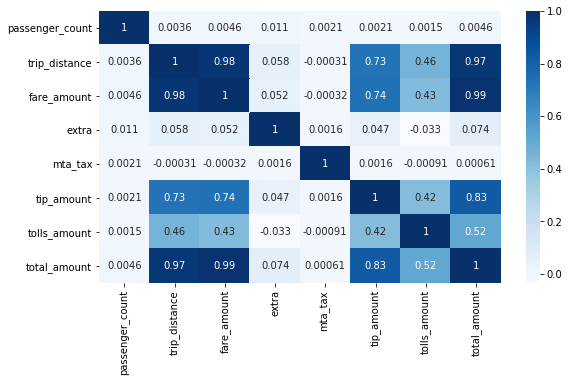

In [8]:
plt.figure(figsize=(9,5))
#Removed all the categorical value columns to get the actual data to work on
sns.heatmap(df1[['passenger_count', 'trip_distance', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount','total_amount']].corr(),annot=True, cmap='Blues')

In [9]:
df1.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount'],
      dtype='object')

In [10]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

In [24]:
x = df1[['passenger_count']]
y = df1['total_amount']

In [12]:
model = SVR()

In [13]:
seed = 10

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [15]:
x_train.shape

(350000, 7)

In [16]:
y_train.shape

(350000,)

In [18]:
regressor = SVR(kernel='linear')

In [19]:
regressor.fit(x_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [37]:
y_pred = regressor.predict(x_test)

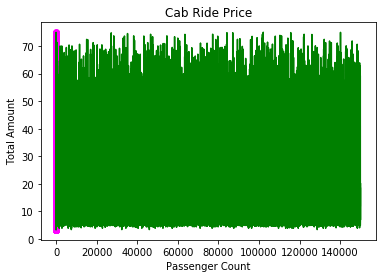

In [29]:
plt.scatter(x, y, color = 'magenta')
plt.plot(x, y, regressor.predict(x_test), color = 'green')
plt.title('Cab Ride Price')
plt.xlabel('Passenger Count')
plt.ylabel('Total Amount')
plt.show()